# **Aprendizaje supervisado**
# SL04. Regresión Lineal

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## <font color='blue'>**Regresion lineal simple**</font>

Comenzaremos con la regresión lineal más familiar, un ajuste de línea recta a los datos.
Un ajuste en línea recta es un modelo de la forma
$$
y = ax + b
$$
donde $a$ se conoce comúnmente como *pendiente*, y $b$ se conoce comúnmente como *intersección*.

Considere los siguientes datos, que se encuentran dispersos sobre una línea con una pendiente de 2 y una intersección de -5:

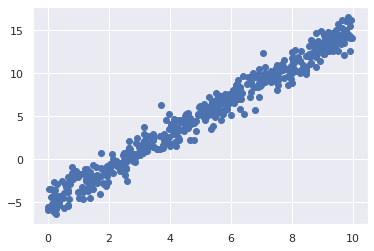

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(500)
y = 2 * x - 5 + rng.randn(500)
plt.scatter(x, y);

Usaremos el estimador de Scikit-Learn ``LinearRegression`` para ajustar la data y construir el modelo:

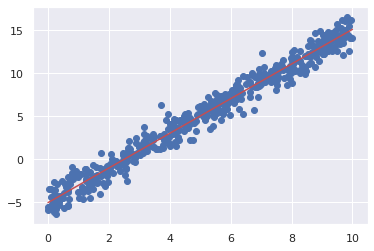

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit,'r');

La pendiente y la intersección de los datos están contenidos en los parámetros de ajuste del modelo, que en Scikit-Learn siempre están marcados con un guión bajo al final.
Aquí los parámetros relevantes son `` coef_`` e `` intercept_``:

In [5]:
print("Pendiente:    ", model.coef_[0])
print("Intercepto:", model.intercept_)

Pendiente:     2.0144929846770885
Intercepto: -5.0337635250371235


Vemos que los resultados están muy cerca de las entradas, como podríamos esperar.

Sin embargo, el estimador de ``LinearRegression`` es mucho más capaz que esto; además de ajustes simples en línea recta, también puede manejar modelos lineales multidimensionales de la forma
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
donde hay multiples valores $x$.
Geométricamente, esto es similar a ajustar un plano a puntos en tres dimensiones, o ajustar un hiperplano a puntos en dimensiones más altas.

La naturaleza multidimensional de tales regresiones las hace más difíciles de visualizar, pero podemos ver uno de estos ajustes en acción construyendo algunos datos de ejemplo, usando el operador de multiplicación de matrices de NumPy:

In [6]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.50000000000001
[ 1.5 -2.   1. ]


Aquí, los datos $ y $ se construyen a partir de tres valores $ x $ aleatorios, y la regresión lineal recupera los coeficientes utilizados para construir los datos.

De esta manera, podemos usar el estimador único de ``LinearRegression``  para ajustar líneas, planos o hiperplanos a nuestros datos.
Todavía parece que este enfoque se limitaría a relaciones estrictamente lineales entre variables, pero resulta que también podemos relajar esto.

## <font color='green'>Actividad 1</font> 

1. Realice un 5-fold cross validation con el modelo de regresión lineal con los datos anteriores (*X* e *y*).
2. Evalúe el error para los distintos conjuntos de test.

¿Qué tan estable es el modelo?, ¿Cuán bueno es el error?


In [ ]:
# Solución


<font color='green'>Fin Actividad 1</font>

## <font color='blue'>**Regresión de funciones base**</font>

Sea $H$ una familia de funciones $X \rightarrow Y$ y $T = \{(x_1,y_1),.....(x_n,y_n)\}$  un training set. Donde $x_i \in \mathbb{R}^D$ y $y_i \in \mathbb{R}$. Entonces se quiere seleccionar la función $g \in H$ que minimiza el error dado por:

$$ E(g) = \frac{1}{2} \sum_{i=1}^n (g(x_i) - y_i)^2$$

En el caso de las funciones lineales nuestro H corresponde a:

$$ \{h(x): h(x) = w_o + \sum_{i=1}^D w_ix_i \}$$

¿Cómo podemos expandir nuestro H pero que el mecanismo lineal siga 
funcionando?

Sea:
 $$\phi_1,....,\phi_M:\mathbb{R}^D \rightarrow \mathbb{R}$$

Entonces un elemento $h \in H$ tiene la forma de:
$$ h(x) = w_o + \sum_{i=1}^M w_i\phi_i(x)$$

Al conjunto de funciones $\phi_i$, lo llamaremos funciones base.




Un truco que puede utilizar para adaptar la regresión lineal a relaciones no lineales entre variables es transformar los datos de acuerdo con *funciones base*.

La idea es tomar nuestro modelo lineal multidimensional:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
y construir $x_1, x_2, x_3,$, de nuestra entrada unidimiensional $x$.
Esto es, $x_n = f_n(x)$, donde $f_n()$ es una funcion que transforma la data.

Por ejemplo, si $f_n(x) = x^n$, nuestro modelo se transforma en una regresion polinomial:
$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$
Observe que este es *todavía un modelo lineal*: la linealidad se refiere al hecho de que los coeficientes $a_n$ nunca se multiplican ni se dividen entre sí.
Lo que hemos hecho efectivamente es tomar nuestros valores unidimensionales $x$ y proyectarlos en una dimensión superior, de modo que un ajuste lineal pueda encajar relaciones más complicadas entre $x$ y $y$.

### Funciones de base polinomial

Esta proyección polinomial es lo suficientemente útil como para estar integrada en Scikit-Learn, utilizando el transformador ``PolynomialFeatures``:

In [7]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

Vemos aquí que el transformador ha convertido nuestra matriz unidimensional en una matriz tridimensional tomando el exponente de cada valor.
Esta nueva representación de datos de mayor dimensión se puede conectar a una regresión lineal.


In [8]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

Con esta transformación en su lugar, podemos usar el modelo lineal para ajustar relaciones mucho más complicadas entre $x$ y $y$.
Por ejemplo, aquí hay una onda sinusoidal con ruido:

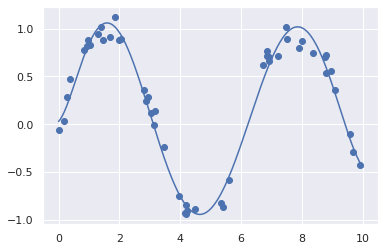

In [9]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y) # Un espacio de 7 dimensiones mas un bias.
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [10]:
print(poly_model.steps[1][1].coef_) # 8 Coeficientes

[ 0.00000000e+00  3.31250194e-01  1.28845778e+00 -1.06474496e+00
  2.90659230e-01 -3.57011703e-02  2.01614685e-03 -4.20513337e-05]


Nuestro modelo lineal, mediante el uso de funciones de base polinomial de séptimo orden, puede proporcionar un ajuste excelente a estos datos no lineales.

### Funciones base gaussianas
Por supuesto, son posibles otras funciones básicas.
Por ejemplo, un patrón útil es ajustar un modelo que no es una suma de bases polinomiales, sino una suma de bases gaussianas.
El resultado podría parecerse a la siguiente figura:

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.06-gaussian-basis.png?raw=1)
[figure source in Appendix](#Gaussian-Basis)

Las regiones sombreadas en el gráfico son las funciones base escaladas y, cuando se suman, reproducen la curva suave a través de los datos.
Estas funciones de base gaussiana no están integradas en Scikit-Learn, pero podemos escribir un transformador personalizado que las creará, como se muestra aquí y se ilustra en la siguiente figura (los transformadores de Scikit-Learn se implementan como clases de Python; leer la fuente de Scikit-Learn es una buena forma de ver cómo se pueden crear):

## <font color='green'>Actividad 2</font>

Entienda el código y describa la utilidad de cada uno de los metodos definidos.

Ayuda: 
1. Scikit-Learn nos proporciona dos excelentes clases base, TransformerMixin y BaseEstimator. Heredar de TransformerMixin asegura que todo lo que tenemos que hacer es escribir nuestros métodos de fit  y transform y obtenemos fit_transform de forma gratuita. La herencia de BaseEstimator garantiza que obtengamos get_params y set_params de forma gratuita. Dado que el método fit  no necesita hacer nada más que devolver el objeto en sí, todo lo que realmente necesitamos hacer después de heredar de estas clases es definir el método de transformación para nuestro transformador personalizado y obtenemos un transformador personalizado completamente funcional que puede ser sin problemas integrado con una canalización de scikit-learn! Fácil.

2. Las bases gaussianas tienen la siguiente forma. $\phi_j = wj*exp(-\frac {(x - \mu_j)^2}{2\sigma^2})$

3. Puede mirar el siguiente link. https://towardsdatascience.com/custom-transformers-and-ml-data-pipelines-with-python-20ea2a7adb65


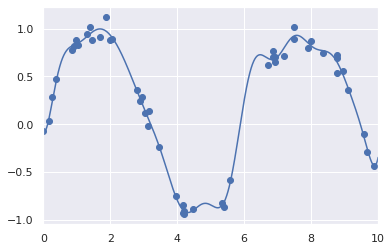

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

<font color='green'>Fin Actividad 2</font>

In [12]:
 #  Desarmando el cadigo de mas arriba.
 def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))

def fite(X, N, width_factor=2.0):
        # create N centers spread along the data range
        centers_ = np.linspace(X.min(), X.max(), N)
        width_ = width_factor * (centers_[1] - centers_[0])
        return centers_, width_

def transform(X, centers_, width_):
        return _gauss_basis(X[:, :, np.newaxis], centers_,
                                 width_, axis=1)
        
centers_, width_ = fite(x[:, np.newaxis], 20)
results = transform(x[:, np.newaxis],centers_, width_ )
print(results)

[[3.27895592e-04 2.14425001e-03 1.09204779e-02 4.33145936e-02
  1.33799110e-01 3.21883405e-01 6.03073613e-01 8.79971175e-01
  9.99983756e-01 8.85001128e-01 6.09987707e-01 3.27434714e-01
  1.36884646e-01 4.45667675e-02 1.13004025e-02 2.23153173e-03
  3.43193143e-04 4.11055551e-05 3.83432404e-06 2.78550207e-07]
 [3.99943777e-11 1.12290300e-09 2.45534158e-08 4.18126771e-07
  5.54536850e-06 5.72768633e-05 4.60738413e-04 2.88639655e-03
  1.40826359e-02 5.35104107e-02 1.58350339e-01 3.64943884e-01
  6.55027544e-01 9.15628737e-01 9.96794530e-01 8.45119761e-01
  5.58029614e-01 2.86960828e-01 1.14924961e-01 3.58453228e-02]
 [1.00000000e+00 8.82496903e-01 6.06530660e-01 3.24652467e-01
  1.35335283e-01 4.39369336e-02 1.11089965e-02 2.18749112e-03
  3.35462628e-04 4.00652974e-05 3.72665317e-06 2.69957850e-07
  1.52299797e-08 6.69158609e-10 2.28973485e-11 6.10193668e-13
  1.26641655e-14 2.04697171e-16 2.57675711e-18 2.52616378e-20]
 [1.47593148e-02 5.56314785e-02 1.63305716e-01 3.73343461e-01
  6.6

Ponemos este ejemplo aquí solo para aclarar que no hay nada mágico en las funciones de base polinómica: si tiene algún tipo de intuición en el proceso de generación de sus datos que le hace pensar que una base u otra podría ser apropiada, puede usarlas como bien.

## <font color='blue'>**Regularization**</font>

La introducción de funciones base en nuestra regresión lineal hace que el modelo sea mucho más flexible, pero también puede conducir muy rápidamente a un ajuste excesivo.
Por ejemplo, si elegimos demasiadas funciones de base gaussiana, terminamos con resultados que no se ven tan bien:

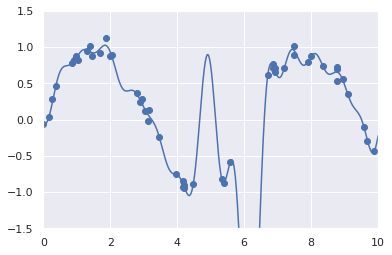

In [13]:
model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

Con los datos proyectados a la base de 30 dimensiones, el modelo tiene demasiada flexibilidad y llega a valores extremos entre ubicaciones donde está limitado por los datos.
Podemos ver la razón de esto si graficamos los coeficientes de las bases gaussianas con respecto a sus ubicaciones:

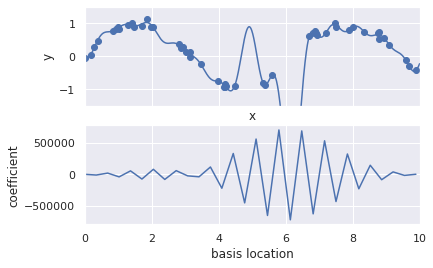

In [14]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

In [ ]:
print(model.steps[1][1].coef_)

El panel inferior de esta figura muestra la amplitud de la función base en cada ubicación.
Este es un comportamiento de sobreajuste típico cuando las funciones base se superponen: los coeficientes de las funciones base adyacentes explotan y se cancelan entre sí.
Sabemos que tal comportamiento es problemático, y sería bueno si pudiéramos limitar explícitamente tales picos en el modelo penalizando los valores grandes de los parámetros del modelo.
Esta penalización se conoce como *regularización* y se presenta en varias formas.

### Ridge regression ($L_2$ Regularization)

Quizás la forma más común de regularización se conoce como *ridge regression* o $ L_2 $ *regularización*, a veces también llamada *regularización de Tikhonov*.
Esto procede penalizando la suma de cuadrados (norma L2) de los coeficientes del modelo; en este caso, la penalización en el ajuste del modelo sería
$$
P = \alpha\sum_{n=1}^N \theta_n^2
$$
donde $\alpha$ es un parametro libre que controla la fuerza de la penalidad.


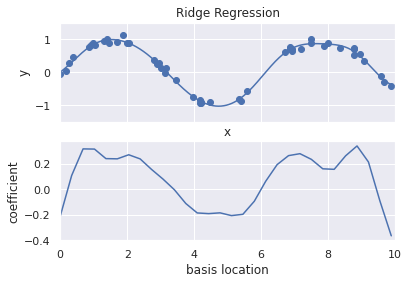

In [15]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

El parámetro $\alpha$ es esencialmente una perilla que controla la complejidad del modelo resultante.
En el límite $\alpha\ \to 0$, recuperamos el resultado de regresión lineal estándar; en el límite $\alpha \to \infty$, se suprimirán todas las respuestas del modelo.
Una ventaja de la regresión de crestas en particular es que se puede calcular de manera muy eficiente, a un costo computacional apenas mayor que el modelo de regresión lineal original.

### Lasso regression ($L_1$ regularization)

Otro tipo de regularización muy común se conoce como lazo, e implica penalizar la suma de valores absolutos (1-norma) de los coeficientes de regresión:
$$
P = \alpha\sum_{n=1}^N |\theta_n|
$$
Aunque esto es conceptualmente muy similar a la regresión de crestas, los resultados pueden diferir sorprendentemente: por ejemplo, debido a razones geométricas, la regresión de lazo tiende a favorecer *modelos dispersos* cuando es posible: es decir, preferentemente establece los coeficientes del modelo exactamente a cero.

Podemos ver este comportamiento al duplicar la figura de regresión de la cresta, pero usando coeficientes normalizados L1:

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e-03, tolerance: 2.065e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


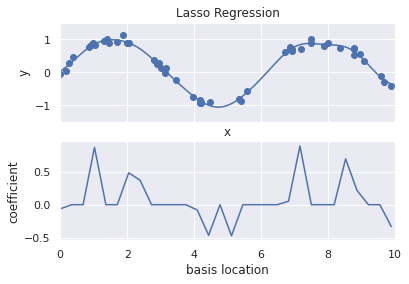

In [16]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')

Con la penalización por regresión de lazo, la mayoría de los coeficientes son exactamente cero, y el comportamiento funcional está modelado por un pequeño subconjunto de las funciones básicas disponibles.
Al igual que con la regularización de crestas, el parámetro $\alpha$ ajusta la fuerza de la penalización y debe determinarse mediante, por ejemplo, validación cruzada.

## <font color='green'>Actividad 3</font>

Usaremos el *Combined Cycle Power Plant Data Set*.

1. Implementa distintos modelos de regresión para predecir el Energy Output (EP) de la planta y compare sus resultados. Los parametros entregados son los siguientes:
  * Ambient Temperature (AT)
  * Exhaust Vaucum (V)
  * Ambient Pressure (AP)
  * Relative Humidity (RH)

2. Grafique sus resultados.
3. Calcular el coeficiente de correlación de Pearson

In [ ]:
#Solución

<font color='green'>Fin Actividad 3</font>

## <font color='green'>Actividad 4</font>

**Tarea individual:** La regresión lineal se estudió a través del método de los minimos cuadrados. En esta actividad le proponemos el desafío de implementar la regresión lineal a traves del algoritmo de gradiente descendente. 

Para esto uste debe aprender cómo funciona  el algoritmo de descenso de gradientes e implementarlo desde cero en Python y aplicarlo al problema de regresión lineal. 

Para el desarrollo de la tarea, sugerimos estudiar el siguiente tutorial:

https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931

In [ ]:
#Solución

<font color='green'>Fin Actividad 4</font>